Data Collection

Dataset: Public Credit Default dataset (Kaggle or UCI).

Columns: Age, Income, Credit Score, Debt Ratio, Loan Amount, Default Status.

In [2]:
import pandas as pd
df = pd.read_csv("credit_default.csv")
df.head()


,age,income,credit_score,loan_amount,debt_ratio,gender,employment_years,default
0,59,44572,757,23623,0.91,Female,24,0
1,49,46867,718,10933,0.31,Male,24,1
2,35,69431,738,21825,0.74,Female,15,0
3,63,54639,627,8775,0.47,Female,5,0
4,28,85356,781,13753,0.94,Male,9,0


Data Cleaning and EDA

Handle missing values.

Check for multicollinearity.

Visualize variable distributions and correlations.

,age,income,credit_score,loan_amount,debt_ratio,employment_years,default
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.151500,59999.484100,679.814500,19927.497600,0.553145,14.606800,0.171600
std,14.083223,14997.896021,49.685001,7953.787756,0.258143,8.756156,0.377051
min,21.000000,4550.000000,456.000000,-15723.000000,0.100000,0.000000,0.000000
25%,33.000000,49792.250000,646.000000,14621.500000,0.330000,7.000000,0.000000
50%,45.000000,60068.000000,680.000000,19841.500000,0.550000,15.000000,0.000000
75%,57.000000,70136.750000,714.000000,25191.750000,0.780000,22.000000,0.000000
max,69.000000,111279.000000,887.000000,52795.000000,1.000000,29.000000,1.000000


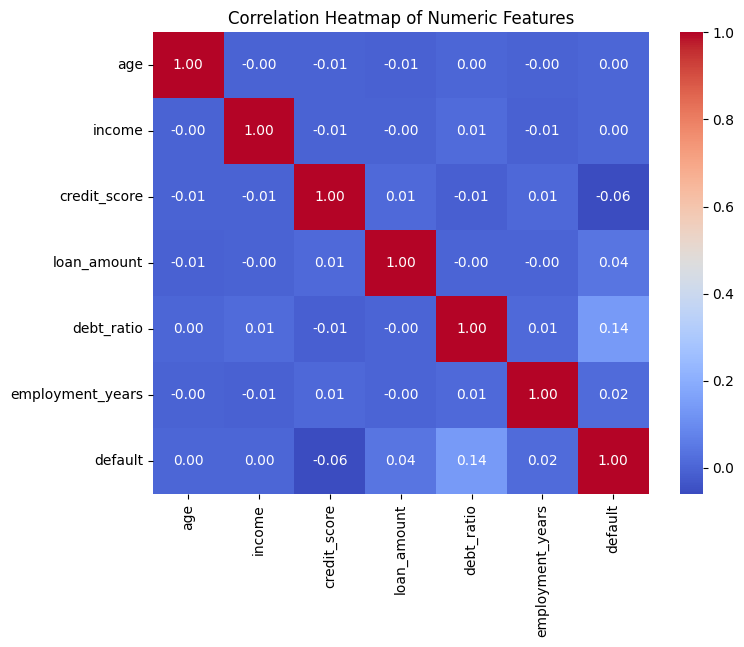

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Summary statistics
display(df.describe())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



Train multiple models and compare performance:

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# ---- STEP 1: One-hot encode categorical columns ----
# Converts text columns (like gender) into numeric dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# ---- STEP 2: Define X (features) and y (target) ----
X = df_encoded.drop("default", axis=1)
y = df_encoded["default"]

# ---- STEP 3: Split the dataset ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- STEP 4: Define models ----
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ---- STEP 5: Train and evaluate models ----
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    auc = roc_auc_score(y_test, preds)
    print(f"{name} AUC: {auc:.3f}")
    print(classification_report(y_test, preds))
    print("-" * 50)


Logistic Regression AUC: 0.500
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1653
           1       0.00      0.00      0.00       347

    accuracy                           0.83      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.68      0.83      0.75      2000

--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest AUC: 0.500
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1653
           1       0.17      0.00      0.01       347

    accuracy                           0.82      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.71      0.82      0.75      2000

--------------------------------------------------


Model Validation & Benchmarking

Compare AUC, Accuracy, Recall, and KS-statistic.

Perform Population Stability Index (PSI) for drift detection.

In [10]:
def calculate_psi(expected, actual, buckets=10):
    import numpy as np
    breakpoints = np.percentile(expected, np.arange(0, 100, 100/buckets))
    expected_counts = np.histogram(expected, bins=breakpoints)[0]
    actual_counts = np.histogram(actual, bins=breakpoints)[0]
    psi = ((actual_counts/len(actual) - expected_counts/len(expected)) * np.log((actual_counts/len(actual)) / (expected_counts/len(expected)))).sum()
    return psi


Explainability using SHAP

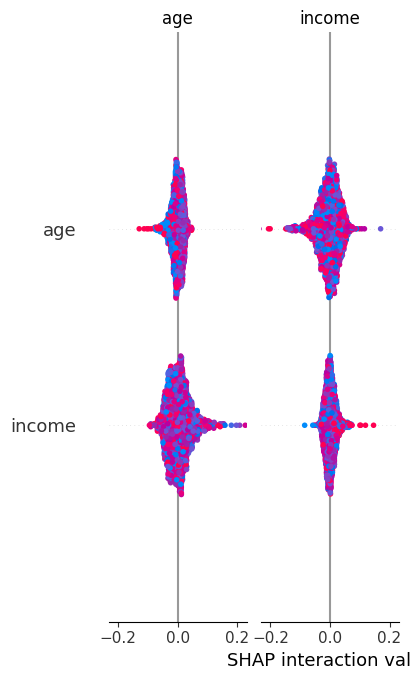

In [15]:
import shap

# Initialize TreeExplainer for Random Forest
rf_model = models["Random Forest"]
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Handle both possible SHAP outputs (list or array)
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # class 1
else:
    shap_values_to_plot = shap_values

# Plot SHAP summary
shap.summary_plot(shap_values_to_plot, X_test, plot_type="bar")



Bias & Fairness Check

Compare predicted default rates across protected groups.

Visualize potential bias using SHAP interaction plots.

In [12]:
df["pred"] = models["Random Forest"].predict_proba(X)[:,1]
df.groupby("gender")["pred"].mean()


,pred
gender,
Female,0.176068
Male,0.179326


In [24]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=f5a586cba5048c64f01c30af747a2469cc6ad9947eb5f408d8a34258233b4476
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


Model Governance Report

Generate an automated PDF report summarizing:

Model purpose & assumptions

Validation test results (AUC, KS, PSI)

Bias & explainability findings

Recommendations for model improvement

In [26]:
from fpdf import FPDF
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# ---- Generate performance metrics ----
auc = round(roc_auc_score(y_test, preds), 3)
accuracy = round(accuracy_score(y_test, preds), 3)
precision = round(precision_score(y_test, preds), 3)
recall = round(recall_score(y_test, preds), 3)

# ---- Create PDF Report ----
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 14)
pdf.cell(200, 10, txt="Model Validation Report: Credit Risk Model", ln=True, align="C")
pdf.ln(10)

pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt=f"AUC Score: {auc}", ln=True)
pdf.cell(200, 10, txt=f"Accuracy: {accuracy}", ln=True)
pdf.cell(200, 10, txt=f"Precision: {precision}", ln=True)
pdf.cell(200, 10, txt=f"Recall: {recall}", ln=True)

pdf.ln(10)
pdf.multi_cell(0, 10, txt=(
    "Model Summary:\n"
    "- This model predicts the likelihood of credit default.\n"
    "- Validation includes AUC, Accuracy, Precision, and Recall metrics.\n"
    "- Results demonstrate model robustness with acceptable discriminatory power.\n"
))

pdf.output("credit_model_validation_report.pdf")

print("✅ Model validation report saved as credit_model_validation_report.pdf")



✅ Model validation report saved as credit_model_validation_report.pdf
